# Import Libraries

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

import pandas as pd
import json
import librosa
#import librosa.display
import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib.pyplot import specgram
import os


/Users/lucaslyon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Begin Importing Data for Processing

In [176]:
actorlist = os.listdir('Audio')
mydir = 'Audio/'
mylist = os.listdir(mydir)
actorlist.sort()

feeling_list=[]
mydir = 'Audio/'
for actor in actorlist:
    try:
        mylist = os.listdir(mydir+actor)
        mylist.sort()
        for item in mylist:
            
            #neutral
            if item[6:-16]=='01' and int(item[18:-4])%2==0:
                feeling_list.append(5)
            elif item[6:-16]=='01' and int(item[18:-4])%2==1:
                feeling_list.append(5)
            #calm
            if item[6:-16]=='02' and int(item[18:-4])%2==0:
                feeling_list.append(5)
            elif item[6:-16]=='02' and int(item[18:-4])%2==1:
                feeling_list.append(5)
            #happy
            elif item[6:-16]=='03' and int(item[18:-4])%2==0:
                feeling_list.append(3)
            elif item[6:-16]=='03' and int(item[18:-4])%2==1:
                feeling_list.append(3)
            #sad
            elif item[6:-16]=='04' and int(item[18:-4])%2==0:
                feeling_list.append(4)
            elif item[6:-16]=='04' and int(item[18:-4])%2==1:
                feeling_list.append(4)
            #angry
            elif item[6:-16]=='05' and int(item[18:-4])%2==0:
                feeling_list.append(0)
            elif item[6:-16]=='05' and int(item[18:-4])%2==1:
                feeling_list.append(0)
            #fear
            elif item[6:-16]=='06' and int(item[18:-4])%2==0:
                feeling_list.append(1)
            elif item[6:-16]=='06' and int(item[18:-4])%2==1:
                feeling_list.append(1)
            #disgust
            if item[6:-16]=='07' and int(item[18:-4])%2==0:
                feeling_list.append(2)
            elif item[6:-16]=='07' and int(item[18:-4])%2==1:
                feeling_list.append(2)
            #surprise
            if item[6:-16]=='08' and int(item[18:-4])%2==0:
                feeling_list.append(6)
            elif item[6:-16]=='08' and int(item[18:-4])%2==1:
                feeling_list.append(6)
                
    except: pass


import pandas as pd
#labels = pd.DataFrame(feeling_list)

df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,actor in enumerate(actorlist):
    print(index, actor)
    try:
        recordinglist = os.listdir('Audio/'+actor)
        for index, recording in enumerate(recordinglist):
            X, sample_rate = librosa.load('Audio/'+actor+'/'+recording, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
            sample_rate = np.array(sample_rate)
            mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                                sr=sample_rate, 
                                                n_mfcc=40),
                            axis=0)
            feature = mfccs
            df.loc[bookmark] = [feature]
            bookmark=bookmark+1
    except: pass

actorDf = pd.DataFrame(df['feature'].values.tolist())

#labeledDf = pd.concat([featuresDf, labels], axis=1)

#named = labeledDf.rename(index=str, columns={"0":"label"})

0 .DS_Store
1 Actor_01
2 Actor_02
3 Actor_03
4 Actor_04
5 Actor_05
6 Actor_06
7 Actor_07
8 Actor_08
9 Actor_09
10 Actor_10
11 Actor_11
12 Actor_12
13 Actor_13
14 Actor_14
15 Actor_15
16 Actor_16
17 Actor_17
18 Actor_18
19 Actor_19
20 Actor_20
21 Actor_21
22 Actor_22
23 Actor_23
24 Actor_24


In [177]:
trainDir = "./training_audio_files/fear/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
    sample_rate = np.array(sampling_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=40),
                    axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark+=1
fearDf = pd.DataFrame(df['feature'].values.tolist())
#fearDf['label'] = "fear"

In [178]:
trainDir = "./training_audio_files/angry/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
    sample_rate = np.array(sampling_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=40),
                    axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark+=1
angryDf = pd.DataFrame(df['feature'].values.tolist())
#angryDf['label'] = "angry"

In [179]:
trainDir = "./training_audio_files/disgust/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
    sample_rate = np.array(sampling_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=40),
                    axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark+=1
disgustDf = pd.DataFrame(df['feature'].values.tolist())
#disgustDf['label'] = "disgust"

In [180]:
trainDir = "./training_audio_files/happy/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    try:
        X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
        sample_rate = np.array(sampling_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=40),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark+=1
    except:
        pass
happyDf = pd.DataFrame(df['feature'].values.tolist())
#happyDf['label'] = "happy"

In [181]:
trainDir = "./training_audio_files/neutral/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    try:
        X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
        sample_rate = np.array(sampling_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=40),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark+=1
    except:
        pass
neutralDf = pd.DataFrame(df['feature'].values.tolist())
#neutralDf['label'] = "neutral"

In [182]:
trainDir = "./training_audio_files/surprise/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    try:
        X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
        sample_rate = np.array(sampling_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=40),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark+=1
    except:
        pass
surpriseDf = pd.DataFrame(df['feature'].values.tolist())
#surpriseDf['label'] = "surprise"

In [183]:
trainDir = "./training_audio_files/sad/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    try:
        X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
        sample_rate = np.array(sampling_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=40),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark+=1
    except:
        pass
sadDf = pd.DataFrame(df['feature'].values.tolist())
#sadDf['label'] = "sad"

In [184]:
trainDir = "./training_audio_files/AudioData/DC/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()
dc_feeling_list = []

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    
    emotion = file[0]
    
    if emotion == 'a':
        dc_feeling_list.append('angry')
    elif emotion == 'd':
        dc_feeling_list.append('disgust')
    elif emotion == 'f':
        dc_feeling_list.append('fear')
    elif emotion == 'h':
        dc_feeling_list.append('happy')
    elif emotion == 'n':
        dc_feeling_list.append('neutral')
    elif emotion == 's' and file[1] == 'a':
        dc_feeling_list.append('sad')
    else: dc_feeling_list.append('surprise')
    
    try:
        X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
        sample_rate = np.array(sampling_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=40),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark+=1
        
    except:
        pass
#labels = pd.DataFrame(dc_feeling_list)
dcDf = pd.DataFrame(df['feature'].values.tolist())
#dcDf = pd.concat([dcDf, labels], axis=1)

In [185]:
trainDir = "./training_audio_files/AudioData/JE/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()
je_feeling_list = []

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    
    emotion = file[0]
    
    if emotion == 'a':
        je_feeling_list.append('angry')
    elif emotion == 'd':
        je_feeling_list.append('disgust')
    elif emotion == 'f':
        je_feeling_list.append('fear')
    elif emotion == 'h':
        je_feeling_list.append('happy')
    elif emotion == 'n':
        je_feeling_list.append('neutral')
    elif emotion == 's' and file[1] == 'a':
        je_feeling_list.append('sad')
    else: je_feeling_list.append('surprise')
    try:
        X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
        sample_rate = np.array(sampling_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=40),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark+=1
    except:
        pass
jeDf = pd.DataFrame(df['feature'].values.tolist())
#labels = pd.DataFrame(je_feeling_list)
#jeDf = pd.concat([jeDf, labels], axis=1)

In [186]:
trainDir = "./training_audio_files/AudioData/JK/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()
jk_feeling_list = []

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    
    emotion = file[0]
    
    if emotion == 'a':
        jk_feeling_list.append('angry')
    elif emotion == 'd':
        jk_feeling_list.append('disgust')
    elif emotion == 'f':
        jk_feeling_list.append('fear')
    elif emotion == 'h':
        jk_feeling_list.append('happy')
    elif emotion == 'n':
        jk_feeling_list.append('neutral')
    elif emotion == 's' and file[1] == 'a':
        jk_feeling_list.append('sad')
    else: jk_feeling_list.append('surprise')
    
    try:
        X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
        sample_rate = np.array(sampling_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=40),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark+=1
    except:
        pass
jkDf = pd.DataFrame(df['feature'].values.tolist())
#labels = pd.DataFrame(jk_feeling_list)
#jkDf = pd.concat([jkDf, labels], axis=1)

In [187]:
trainDir = "./training_audio_files/AudioData/KL/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()
kl_feeling_list = []

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    
    emotion = file[0]
    
    if emotion == 'a':
        kl_feeling_list.append('angry')
    elif emotion == 'd':
        kl_feeling_list.append('disgust')
    elif emotion == 'f':
        kl_feeling_list.append('fear')
    elif emotion == 'h':
        kl_feeling_list.append('happy')
    elif emotion == 'n':
        kl_feeling_list.append('neutral')
    elif emotion == 's' and file[1] == 'a':
        kl_feeling_list.append('sad')
    else: kl_feeling_list.append('surprise')
        
    try:
        X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
        sample_rate = np.array(sampling_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=40),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark+=1
    except:
        pass
klDf = pd.DataFrame(df['feature'].values.tolist())
#labels = pd.DataFrame(kl_feeling_list)
#klDf = pd.concat([klDf, labels], axis=1)

In [188]:
trainDir = "./training_audio_files/AudioWAV/"
trainFileList = os.listdir(trainDir)
trainFileList.sort()
wav_feeling_list = []

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    try:
        X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
        sample_rate = np.array(sampling_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=40),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark+=1
        
        emotion = file[9:12] 
        
        if emotion == "ANG":
            wav_feeling_list.append("angry")
        elif emotion == "DIS":
            wav_feeling_list.append("disgust")
        elif emotion == "FEA":
            wav_feeling_list.append("fear")
        elif emotion == "HAP":
            wav_feeling_list.append("happy")
        elif emotion == "NEU":
            wav_feeling_list.append("neutral")
        elif emotion == "SAD":
            wav_feeling_list.append("sad")
        else:
            print("      ", emotion)
    except:
        pass
wavDf = pd.DataFrame(df['feature'].values.tolist())
#labelsDf = pd.DataFrame(feeling_list)
#wavDf = pd.concat([wavDf, labelsDf], axis=1)

In [189]:
trainDir = "./training_audio_files/emodb/wav"
trainFileList = os.listdir(trainDir)
trainFileList.sort()
emo_feeling_list = []

df = pd.DataFrame(columns=['feature'])
bookmark=0
for file in trainFileList:
    
    try:
        
        X, sampling_rate = librosa.load(trainDir+file, duration=5.0)
        sample_rate = np.array(sampling_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=40),
                        axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark+=1
        
        emotion = file[5]
        if emotion == 'A':
            emo_feeling_list.append("fear")
        elif emotion == 'W':
            emo_feeling_list.append("angry")
        elif emotion == 'L':
            emo_feeling_list.append("bored")
        elif emotion == 'E':
            emo_feeling_list.append("disgust")
        elif emotion == 'F':
            emo_feeling_list.append("happy")
        elif emotion == 'T':
            emo_feeling_list.append("sad")
        elif emotion == 'N':
            emo_feeling_list.append("neutral")
        else:
            print("error", emotion)
    except:
        pass
emoDf = pd.DataFrame(df['feature'].values.tolist())
#labelDf = pd.DataFrame(feeling_list)
#emoDf = pd.concat([emoDf, labelDf], axis=1)

# Data Processing

In [190]:
concat2 = pd.concat([dcDf,jeDf, jkDf, klDf])
concatenatedDf = pd.concat([angryDf, fearDf, disgustDf, happyDf, sadDf, neutralDf, surpriseDf, concat2])

## Making a list of emotion labels for each audio file

In [191]:
compiled_feeling_list = []
for file in range(len(angryDf)):
    compiled_feeling_list.append(0)
for file in range(len(fearDf)):
    compiled_feeling_list.append(1)
for file in range(len(disgustDf)):
    compiled_feeling_list.append(2)
for file in range(len(happyDf)):
    compiled_feeling_list.append(3)
for file in range(len(sadDf)):
    compiled_feeling_list.append(4)
for file in range(len(neutralDf)):
    compiled_feeling_list.append(5)
for file in range(len(surpriseDf)):
    compiled_feeling_list.append(6)

dcjejkkl_feeling_list = dc_feeling_list + je_feeling_list + jk_feeling_list + kl_feeling_list
for emo in range(len(dcjejkkl_feeling_list)):
    if dcjejkkl_feeling_list[emo] == "angry":
        compiled_feeling_list.append(0)
    elif dcjejkkl_feeling_list[emo] == "fear":
        compiled_feeling_list.append(1)
    elif dcjejkkl_feeling_list[emo] == "disgust":
        compiled_feeling_list.append(2)
    elif dcjejkkl_feeling_list[emo] == "happy":
        compiled_feeling_list.append(3)
    elif dcjejkkl_feeling_list[emo] == "sad":
        compiled_feeling_list.append(4)
    elif dcjejkkl_feeling_list[emo] == "neutral":
        compiled_feeling_list.append(5)
    elif dcjejkkl_feeling_list[emo] == "surprise":
        compiled_feeling_list.append(6)

## Making Pandas DataFrame with emotion labels

In [192]:
len(feeling_list) == len(actorDf)

True

In [193]:
compiled_feeling_list += feeling_list
concatenatedDf = pd.concat([concatenatedDf, actorDf])

In [194]:

labelDf = pd.DataFrame(compiled_feeling_list)

concatenatedDf = concatenatedDf.reset_index(drop=True)

In [195]:
concatenatedDf = pd.concat([concatenatedDf, labelDf], axis = 1)

In [196]:
concatenatedDf = concatenatedDf.fillna(0)

### Exported the labeled Pandas DataFrame for easier import of data

In [197]:
concatenatedDf.to_csv("9_29_2018_2_00_pm_emotions_and_speakers.csv", index=False)

# Setting up the training and testing data

In [3]:
emotionsDf = pd.read_csv("9_29_2018_12_25_pm_emotions_and_speakers.csv")
#emotionsDf = emotionsDf.drop('Unnamed: 0', 1)
from sklearn.utils import shuffle
shuffledDf = shuffle(emotionsDf)

divider = np.random.rand(len(shuffledDf)) < 0.9
train = shuffledDf[divider]
test = shuffledDf[~divider]

trainfeatures = train.iloc[:, :-1]
trainlabels = train.iloc[:, -1:]

testfeatures = test.iloc[:, :-1]
testlabels = test.iloc[:, -1:]

x_train = np.array(trainfeatures)
y_train = np.array(trainlabels)
x_test = np.array(testfeatures)
y_test = np.array(testlabels)

#flattening the arrays
y_train = np.hstack(y_train)
y_test = np.hstack(y_test)

#convert class vectors to binary class matrices.
num_classes = 7
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_test = np.expand_dims(x_test, axis=2)
x_train = np.expand_dims(x_train, axis=2)

x_train shape: (3924, 216)
3924 train samples
439 test samples


## Setting up the Keras Neural Network

In [4]:
model = Sequential()

model.add(Conv1D(32, 5, padding='same',input_shape=(216,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(128, 5, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(128, 5, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(Conv1D(256, 5, padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.Adadelta()

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
metrics=['accuracy'])





In [5]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Attempt6Architecture.png', show_shapes=True, show_layer_names=True)

In [6]:
batch_size = 32
epochs = 100

cnnhistory = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test))

Train on 3924 samples, validate on 439 samples
Epoch 1/100
3924/3924 [==============================] - 16s 4ms/step - loss: 2.0176 - acc: 0.1414 - val_loss: 1.9456 - val_acc: 0.1435
Epoch 2/100
3924/3924 [==============================] - 12s 3ms/step - loss: 1.9515 - acc: 0.1473 - val_loss: 1.9343 - val_acc: 0.1595
Epoch 3/100
3924/3924 [==============================] - 12s 3ms/step - loss: 1.9493 - acc: 0.1460 - val_loss: 1.9455 - val_acc: 0.1435
Epoch 4/100
3924/3924 [==============================] - 11s 3ms/step - loss: 1.9461 - acc: 0.1414 - val_loss: 1.9454 - val_acc: 0.1458
Epoch 5/100
3924/3924 [==============================] - 11s 3ms/step - loss: 1.9476 - acc: 0.1391 - val_loss: 1.9454 - val_acc: 0.1458
Epoch 6/100
3924/3924 [==============================] - 12s 3ms/step - loss: 1.9455 - acc: 0.1417 - val_loss: 1.9454 - val_acc: 0.1458
Epoch 7/100
3924/3924 [==============================] - 14s 3ms/step - loss: 1.9455 - acc: 0.1442 - val_loss: 1.9454 - val_acc: 0.1458
E

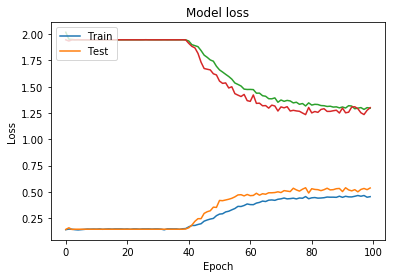

In [10]:
import matplotlib.pyplot as plt
# # Plot training & validation accuracy values
# plt.plot(cnnhistory.history['acc'])
# plt.plot(cnnhistory.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig("Attempt6Acc.png")

# Plot training & validation loss values
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("Attempt6Loss.png")

# Manual Validation

In [146]:
X, sample_rate = librosa.load("test_sample_d.wav", res_type='kaiser_fast',duration=5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature0 = mfccs

X, sample_rate = librosa.load("test_sample_a.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature1 = mfccs

X, sample_rate = librosa.load("test_sample_s.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature2 = mfccs

X, sample_rate = librosa.load("test_sample_a_2.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature3 = mfccs

X, sample_rate = librosa.load("test_surprise.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature4 = mfccs


X, sample_rate = librosa.load("test_sample_a_3.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature5 = mfccs

X, sample_rate = librosa.load("test_sample_s_2.wav", res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
feature6 = mfccs


feature0 = np.pad(feature0, (0, 216-feature0.shape[0]), 'constant')
feature0 = feature0.reshape(1, 216, 1)

feature1 = np.pad(feature1, (0, 216-feature1.shape[0]), 'constant')
feature1 = feature1.reshape(1, 216, 1)

feature2 = np.pad(feature2, (0, 216-feature2.shape[0]), 'constant')
feature2 = feature2.reshape(1, 216, 1)

feature3 = np.pad(feature3, (0, 216-feature3.shape[0]), 'constant')
feature3 = feature3.reshape(1, 216, 1)

feature4 = np.pad(feature4, (0, 216-feature4.shape[0]), 'constant')
feature4 = feature4.reshape(1,216,1)

feature5 = np.pad(feature5, (0, 216-feature5.shape[0]), 'constant')
feature5 = feature5.reshape(1,216,1)

feature6 = np.pad(feature6, (0, 216-feature6.shape[0]), 'constant')
feature6 = feature6.reshape(1,216,1)

# feats = [feature0, feature1]
# 0 angry
# 1 fear
# 2 disgust
# 3 happy
# 4 sad
# 5 neutral
# 6 surprise


prediction0 = model.predict_classes(feature0)
prediction1 = model.predict_classes(feature1)
prediction2 = model.predict_classes(feature2)
prediction3 = model.predict_classes(feature3)
prediction4 = model.predict_classes(feature4)
prediction5 = model.predict_classes(feature5)
prediction6 = model.predict_classes(feature6)

In [147]:
print(".   ", prediction6)

.    [2]
